#  CONVETRY UNIVERSITY
# Information Retrieval (STW7071CEM)
## TASK 1

### Submitted by BIPLUCK SHRESTHA
#### Coventry ID : 14224395
##### 230103@softwarica.edu.np

There are two tasks in this coursework. You can use any general-purpose programming language
of your choice to perform these tasks. However, Python is recommended. The tasks are specified
next.
Task 1: Search Engine
Create a vertical search engine comparable to Google Scholar, but specialized in retrieving just
papers/books published by a member of Coventry University's Research Centre for Intelligent
Healthcare (RCIH):
https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare

#### YOUTUBE : https://www.youtube.com/watch?v=0EzpihrEeIQ
#### GOOGLE DRIVE : https://drive.google.com/drive/folders/1vzfleclxC2Rzbh06oVhmoKdaJf-NPl3u?usp=sharing
#### GITHUB : https://github.com/bipkorn/information_retrieval_assigment_2023

# Preview 

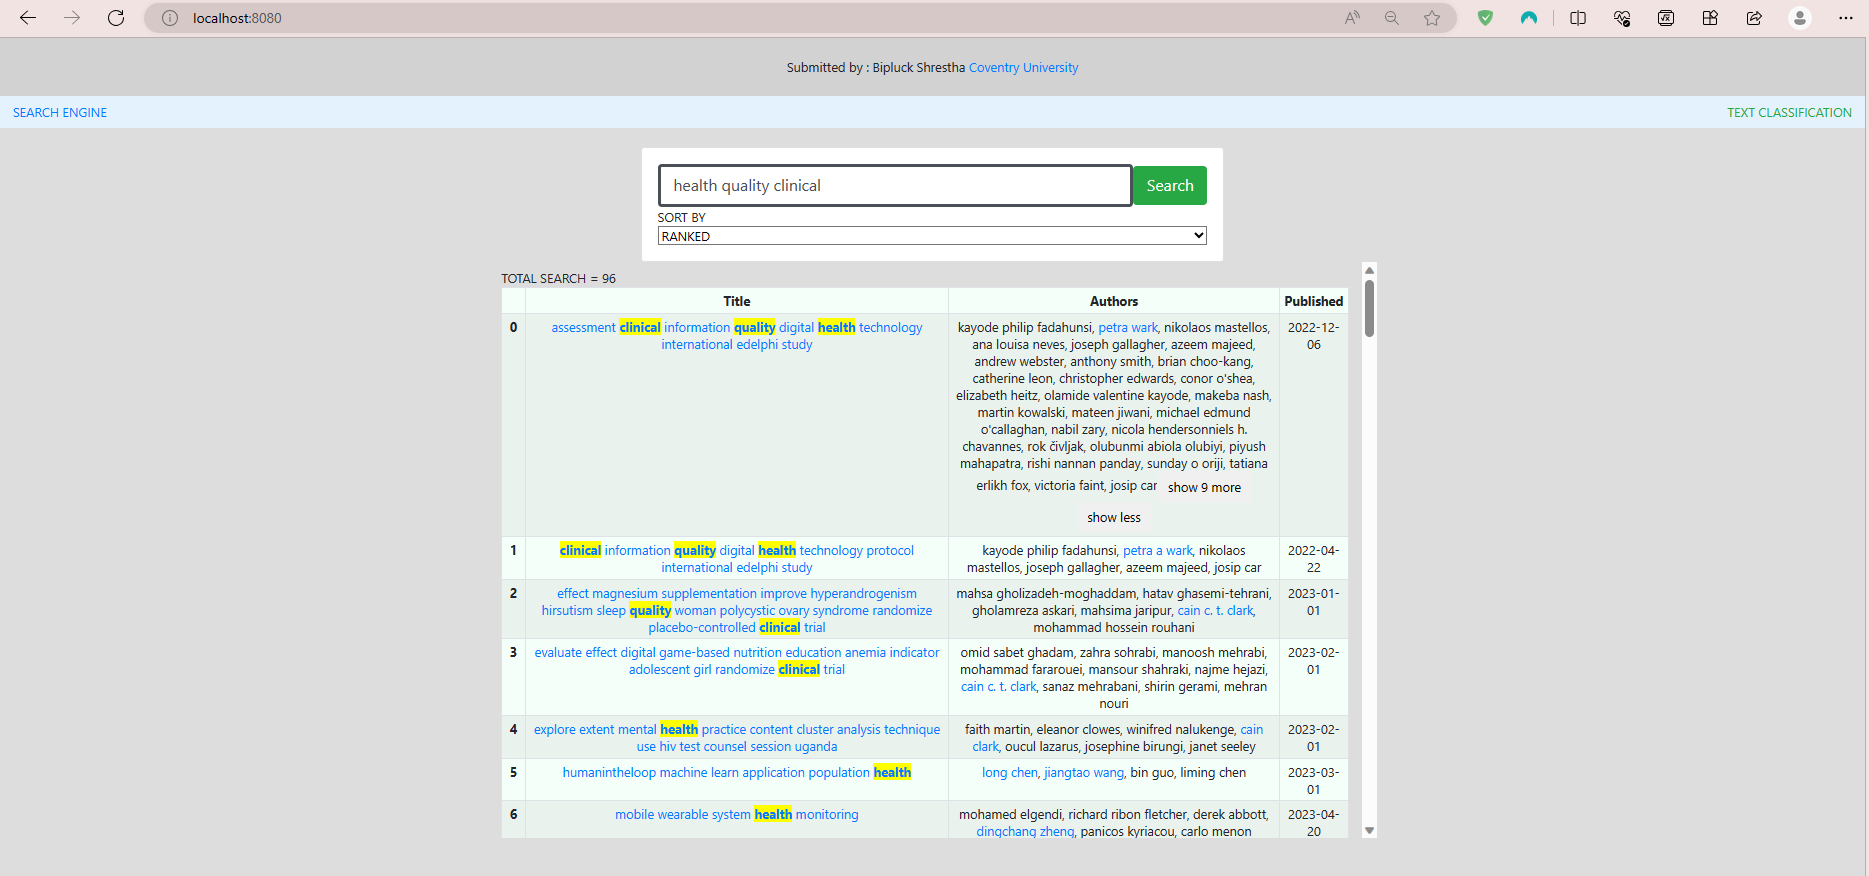

## Introduction 
The goal of this assignment is to create a vertical search engine that can compete with Google Scholar and that can find publications and books by Coventry University authors. 

It is a software application that uses various techniques and methods to index and search large amounts of data on the internet or within a specific domain. A search engine project aims to provide users with relevant and helpful search results based on their queries. I have provided a code snippet that includes components for web crawling, indexing, query processing, and a graphical web user interface. To run the code correctly, you need to install some packages. 

You can run the code after installing the required packages. It consists of several parts. This part is called the Crawler Component, and its function is to crawl the Coventry University website and collect information about academic staff members and their publications. The scrape function is responsible for crawling the webpage and extracting the relevant information. Indexing Component After scraping the data, the construct index function builds an index based on the scraped data. The index is stored in a JSON document named indexes.json.

The query processor reads the user's input and processes the query to match it with the indexed data. The vertical_search_engine
function performs the search and delivers the relevant results. A graphical user interface (GUI) is created in the code using the 
flask  library, and the search function is called when the user clicks the "Search" button. After installing the required packages
and making the necessary changes, you can run the code and use the search engine through the website 
http://localhost:8080 The code is written in python.

## Installing Package

The following is the code that helps to install and import the packages that the application requires. It uses the pip command to 
download the packages from the Python Package Index (PyPI) and then imports them using the import statement. This ensures that the
application has access to the latest versions and features of the packages.

In [1]:
# Delete the "#" before each subsequent line to install the package

# !pip install scrapy
# !pip install requests
# !pip install BeautifulSoup4
# !pip install nltk
# !pip install gensim
# !pip install xgboost
# !pip install pandastable

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import datetime
import string
import json
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('omw-1.4');
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from datetime import datetime

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\blind\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\blind\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\blind\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blind\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\blind\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1 . Crawler Component

In [3]:
URL = "https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/"


This web crawler targets researchers who: "Centre for Intelligent Healthcare"

The following code help to create and read in a csv file. A csv file is a comma-separated values file that stores data in a tabular format. To create a csv file, we can use the built-in csv module in Python. We can use the create_csv_file() function to write data to a file object. To read a csv file, we can use the read_csv_file() function to iterate over the rows of the file object.

In [4]:
def create_csv_file():
     database = pd.DataFrame(columns=['Title', 'Authors', 'Published', 'Link'])
     database.to_csv('database.csv')
    
def read_csv_file(database):
    current_data = pd.read_csv(database, index_col="Unnamed: 0")
    return current_data        


The following function helps the curl command to extract information such as title , authors, and publish date from a publication website. It then saves the extracted data to a csv file.

In [5]:


def researchers_publication_process(newurl):
    page = requests.get(newurl)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(id="main-content")
    papers = results.find_all("li", class_="list-result-item")
    if len(papers)==0 :
        return False
    for paper in papers:
        title = paper.find('h3', class_='title')
        if title is not None:
            title_span = title.find('span')
            title_text = title_span.text if title_span is not None else "N/A"
        else:
            title_text = "N/A"
   
        date = paper.find('span', class_="date")
        date_text = date.text if date is not None else "N/A"
        date_formats = [
            "%Y",
            "%b %Y",
            "%d %b %Y",  
        ]
        
        for date_format in date_formats:
            try:
                date_object = datetime.strptime(date_text, date_format)
                date_text = date_object.strftime("%Y-%m-%d")
                break
            except ValueError:
                pass
        
        link = paper.find('h3', class_='title')
        link_href = link.find('a', href=True)['href'] if link is not None else "N/A"
        profile_page = requests.get(link_href)
        profile_page_soup = BeautifulSoup(profile_page.content, "html.parser")
        authors = profile_page_soup.find('p', class_='relations persons')
        button = soup.find('button')
        button.extract()
        inner_html = ''.join(str(child) for child in authors.contents)
        opening = pd.read_csv('database.csv', index_col="Unnamed: 0")

        new_row = pd.DataFrame({'Title': [title.text],
                                'Authors': [inner_html],
                                'Published': [date_text],
                                'Link': [link_href]})
        
        opening = pd.concat([opening, new_row], ignore_index=True)

        opening.to_csv('database.csv')
        
    return True

The following Function helps to call the above function reseach_publication_process in a loop to cover all the page in url increasing page number in every call and when reseach_publication_process does not finds any article in the page it returns false and and loop ends . So when all article is reached it will auto cut

In [6]:
def web_scrape():
    temp_i=0
    run_till=True
    while run_till :
        newurl=URL
        if(temp_i!=0):
            newurl=newurl+"?page="+str(temp_i)
            #to cuting in 20 if auto cutoff down't work
        if(temp_i>=20):
            run_till=False;
        print(newurl)
        temp_i=temp_i+1;
        run_till=researchers_publication_process(newurl);

This following code is to call create_csv_file and webscrpe function to start webscrape 

In [7]:
# create_csv_file()
# read_csv_file(database='database.csv')
# %time web_scrape() 

### OPT WHILE CURLING
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=1
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=2
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=3
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=4
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=5
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=6
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=7
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=8
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=9
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=10
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=11
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=12
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=13
- https://pureportal.coventry.ac.uk/en/organisations/centre-for-intelligent-healthcare/publications/?page=14
CPU times: total: 48.1 s
Wall time: 24min 15s
2. Indexing 

# 2. Indexing Component

The code performs the following tasks:
- Reads the first CSV file into sample_db using pd.read_csv() and renames the "Unnamed: 0" column to "SN" using rename(). 

- Reads the second CSV file into scraped_db using pd.read_csv() and renames the "Unnamed: 0" column to "SN" using rename(). Also resets the index of scraped_db using reset_index() with drop=True. 

- Displays the first 5 rows of both DataFrames using head(). 

- Selects and copies the row at index 1 from scraped_db using loc[1,:] and copy(), and stores it in single_row

In [8]:
sample_db = pd.read_csv('database.csv').rename(columns={'Unnamed: 0':'SN'})
scraped_db = pd.read_csv('database.csv').rename(columns={'Unnamed: 0':'SN'}).reset_index(drop=True)
scraped_db.head()
sample_db.head(7)
single_row = scraped_db.loc[1,:].copy()
single_row

SN                                                           1
Title        A Serious Game for Patients With Eating Disord...
Authors      Maria Guala, <a class="link person" href="http...
Published                                           2023-01-27
Link         https://pureportal.coventry.ac.uk/en/publicati...
Name: 1, dtype: object

## 2.1 Preprocess Text

The code snippet provided includes functions for text preprocessing and lemmatization. Here's a summary of what each function does:

tp1(txt): This function takes a text input and performs the following steps:

- Converts the text to lowercase.
- Removes punctuation from the text.
- Calls the lematize() function to lemmatize the text.
- Returns the processed text.
- fwpt(word): This function determines the part of speech (POS) tag of a given word. It does the following:

Uses the pos_tag() function from the Natural Language Toolkit (NLTK) to get the POS tags for the input word.
- Maps the POS tag to WordNet POS tags, which are used for lemmatization.
- Returns the WordNet POS tag.
- lematize(text): This function lemmatizes the input text. It performs the following steps:

Tokenizes the text into individual words.
- Initializes an empty string.
- Iterates over each token:
- Checks if the token is not a stop word.
- Lemmatizes the non-stop words using the WordNet Lemmatizer and the appropriate WordNet POS tag obtained from fwpt().
- Appends the lemmatized word to the string with a space.
- Returns the lemmatized text.

In [9]:
# Remove stop words
sw = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def tp1(txt):
    txt = txt.lower()   # Make lowercase
    txt = txt.translate(str.maketrans('','',string.punctuation))  
    txt = lematize(txt)
    return txt


def fwpt(word):
    tag = pos_tag([word])[0][1][0].upper()
    hash_tag = {"V": wordnet.VERB, "R": wordnet.ADV,"N": wordnet.NOUN,"J": wordnet.ADJ}         
    return hash_tag.get(tag, wordnet.NOUN)

def lematize(text):
        tkns = nltk.word_tokenize(text)
        ax = ""
        for each in tkns:
            if each not in sw:
                ax += lemmatizer.lemmatize(each, fwpt(each)) + " "
        return ax


In [10]:
tp1(single_row['Title'])
lematize(tp1(single_row['Title']))
sample_db['Title'].iloc[5]
scraped_db['Title'].iloc[5]

'Congenic hematopoietic stem cell transplantation promotes survival of heart allografts in murine models of acute and chronic rejection'

### 2.1.1 Preprocess entire dataframe

The code provided performs preprocessing on a DataFrame called scraped_db and saves the processed data in a new DataFrame named processed_db. The preprocess_df() function is defined to handle the preprocessing steps. Here's a summarized version of the code:

The code starts by creating a copy of the scraped_db DataFrame and assigning it to processed_db. Then, a function named preprocess_df is defined to preprocess the DataFrame. Inside the function, the 'Title' column is processed by applying the tp1() function, which converts the text to lowercase, removes punctuation, and performs lemmatization. The 'Authors' column is converted to lowercase using the str.lower() function. Additionally, the 'Authors' and 'Published' columns are dropped from the DataFrame using the drop() function.

The preprocess_df function is then called on the processed_db DataFrame to preprocess the data. Finally, the first few rows of the processed_db DataFrame are displayed using the head() function.

In summary, the code performs text preprocessing on the 'Title' column, converts the 'Authors' column to lowercase, and drops unwanted columns from the DataFrame. The resulting processed DataFrame, processed_db, is displayed with its first few rows.

In [11]:
processed_db = scraped_db.copy()

def preprocess_df(df):
    df.Title = df.Title.apply(tp1)
    df.Authors = df.Authors.str.lower()
    df = df.drop(columns=['Authors','Published'], axis=1)
    return df
    
preprocess_df(processed_db)
processed_db.head()

,SN,Title,Authors,Published,Link
0,0,phantom study protective trolley neonatal radi...,"xinhong wang, mengxi xu, cong chen, zhongkun b...",2023-02-01,https://pureportal.coventry.ac.uk/en/publicati...
1,1,serious game patient eat disorder maze pilot u...,"maria guala, <a class=""link person"" href=""http...",2023-01-27,https://pureportal.coventry.ac.uk/en/publicati...
2,2,association covid19 pandemic stroke admission ...,"rachel a van dusen, kiera abernethy, nagendra ...",2023-03-17,https://pureportal.coventry.ac.uk/en/publicati...
3,3,capability opportunity motivation—identifying ...,"chris kite, lou atkinson, <a class=""link perso...",2023-01-28,https://pureportal.coventry.ac.uk/en/publicati...
4,4,cerebral hemodynamics underlie arterytoartery ...,"xueyan feng, hui fang, bonaventure y m ip, ka ...",2023-03-10,https://pureportal.coventry.ac.uk/en/publicati...


## 2.2 Index Construction

### The code snippet provided performs the following operations:

single = processed_db.loc[0,:].copy(): This line selects the first row of the processed_db DataFrame using .loc indexing with row label 0. The .copy() function is used to create a separate copy of the selected row, which is stored in the single variable.

print(single): This line prints the contents of the single row, displaying the values of each column in the row.

words = single.Title.split(): This line splits the 'Title' value of the single row into individual words and stores them in the words list. The .split() method is used to split the text based on whitespace.

SN = single.SN: This line assigns the value of the 'SN' column in the single row to the SN variable.

word = words[0]: This line retrieves the first word from the words list and assigns it to the word variable.

example = {word: [SN]}: This line creates a dictionary named example with word as the key and [SN] as the corresponding value. The dictionary is used to store information related to a specific word.

In [12]:
single = processed_db.loc[0,:].copy()
print(single)
indexing_trial = {}

words = single.Title.split()
SN = single.SN
word = words[0]
example = {word: [SN]}

print('=====================================================================')
print('Sample index')
print(example)

SN                                                           0
Title        phantom study protective trolley neonatal radi...
Authors      xinhong wang, mengxi xu, cong chen, zhongkun b...
Published                                           2023-02-01
Link         https://pureportal.coventry.ac.uk/en/publicati...
Name: 0, dtype: object
Sample index
{'phantom': [0]}


### The provided code snippet defines an indexer function named apply_index that takes two parameters: inputs and index. Here's an explanation of the code in 100 words:

The function splits the 'Title' of the inputs object into individual words and assigns them to the words variable. The 'SN' value of inputs is converted to an integer and assigned to the SN variable.

For each word in the words list:

If the word exists as a key in the index dictionary, it checks if the SN value is not already present in the list associated with that word. If not, it appends the SN value to the list.
If the word does not exist as a key in the index dictionary, it adds the word as a key and assigns a list containing the SN value as the associated value.
Finally, the function returns the modified index dictionary.

The apply_index function is called with inputs set as single and index initialized as an empty dictionary, resulting in the indx variable storing the updated index dictionary.

In [13]:
## Indexer Function
def apply_index(inputs, index):
    words = inputs.Title.split()
    SN = int(inputs.SN)
    for word in words:
        if word in index.keys():
            if SN not in index[word]:
                index[word].append(SN)
        else:
            index[word] = [SN]
    return index

indx = apply_index(inputs=single, index= {})
#print(indx)

full_index(df, index): This function iterates over each row of the DataFrame df and applies the apply_index() function on each row, updating the index dictionary. It returns the updated index dictionary.

construct_index(df, index): This function preprocesses the DataFrame df using the preprocess_df() function, which applies text preprocessing on specific columns. It then calls the full_index() function with the preprocessed DataFrame and the index dictionary to construct the complete index. It returns the constructed index.

Additionally, the code snippet includes the following lines:

indexed = full_index(processed_db, index={}): It calls full_index() on the processed_db DataFrame, starting with an empty index dictionary. The resulting updated index dictionary is stored in indexed.
indexes = construct_index(df=scraped_db, index={}): It calls construct_index() on the scraped_db DataFrame, starting with an empty index dictionary. The constructed index is stored in indexes.

In [14]:
def full_index(df, index):
    for x in range(len(df)):
        inpt = df.loc[x,:]
        ind = apply_index(inputs=inpt, index=index)
    return ind

def construct_index(df, index):
    queue = preprocess_df(df)
    ind = full_index(df=queue, index=index)
    return ind

indexed = full_index(processed_db, 
                     index = {})


indexes = construct_index(df=scraped_db, 
                          index = {})

The code snippet involves reading and writing JSON files to store and update indexes. It writes the indexes dictionary to a file, reads JSON data from a file, defines a function index_2 that updates an index using prior index data and a DataFrame, and saves the updated index back to the file.

In [15]:
with open('indexes.json', 'w') as new_f:
    json.dump(indexes, new_f, sort_keys=True, indent=4)
    
with open('indexes.json', 'r') as file:
    data = json.load(file)

def index_2(df, x_path):
    if len(df) > 0:
        with open(x_path, 'r') as file:
            prior_index = json.load(file)
        new_index = construct_index(df = df, index = prior_index)
        with open(x_path, 'w') as new_f:
            json.dump(new_index, new_f, sort_keys=True, indent=4)

In [16]:
len(data)

2387

## 3.  Query Processor

The code captures user input as search terms, processes the query using the tp1() function, and returns the processed query for further processing or analysis.

In [17]:
def demonstrate_query_processing():
    sample = input('Enter Search Terms: ')
    processed_query = tp1(sample)
    #print(f'User Search Query: {sample}')
    print(f'Processed Search Query: {processed_query}')
    return processed_query
    
#demonstrate_query_processing()

### 3.1.  Split Query into individual terms

The code processes a user's search query, splits it into individual words using the split_query() function, and displays the processed query as well as the split query as a list of words.

In [18]:
def split_query(terms):
    each = tp1(terms)
    return each.split()
# dqp = demonstrate_query_processing()
# dqp
# print(f'Split Query: {split_query(dqp)}')

### 3.2.  Boolean Functionalities

def union(lists): This function takes a list of lists (lists) as input. It applies set operations to find the union of all the lists. The map(set, lists) converts each inner list into a set, and set.union() performs the union operation on these sets. The result is converted back to a list, sorted in ascending order, and returned.

def intersection(lists): This function takes a list of lists (lists) as input. It applies set operations to find the intersection of all the lists. The map(set, lists) converts each inner list into a set, and set.intersection() performs the intersection operation on these sets. The result is converted back to a list, sorted in ascending order, and returned.

In [19]:
def union(lists):
    union = list(set.union(*map(set, lists)))
    union.sort()
    return union

def intersection(lists):
    intersect = list(set.intersection(*map(set, lists)))
    intersect.sort()
    return intersect

### 3.3. Search Engine Function

In [20]:
def vertical_search_engine(df, query, index=indexes):
    query_split = split_query(query)
    retrieved = []
    for word in query_split:
        if word in index.keys():
            retrieved.append(index[word])
            
    # Ranked Retrieval
    if len(retrieved)>0:
        high_rank_result = intersection(retrieved)
        low_rank_result = union(retrieved) 
        c = [x for x in low_rank_result if x not in high_rank_result]      
        high_rank_result.extend(c)
        result = high_rank_result
        
        final_output = df[df.SN.isin(result)].reset_index(drop=True)
    
        # Return result in order of Intersection ----> Union
        dummy = pd.Series(result, name = 'SN').to_frame()
        result = pd.merge(dummy, final_output, on='SN', how = 'left')
        
    else:
        result = 'No result found'
    
    return result

In [21]:
def test_search_engine():
    xtest = scraped_db.copy()
    query = input("Enter your search query: ")
    return vertical_search_engine(xtest, query, indexed)
    
#test_search_engine()

In [22]:
def final_engine(results):
    if type(results) != 'list':
        return results
    else:
        for i in range(len(results)):
            printout = results.loc[i, :]

In [23]:
scraped_db['Authors'].iloc[24]

'sarah cassidy, emily mclaughlin, rachel mcgranaghan, <a class="link person" href="https://pureportal.coventry.ac.uk/en/persons/mirabel-pelton" rel="person"><span>mirabel pelton</span></a>, rory o\'connor, jacqui rodgers'

In [24]:
#final_engine(test_search_engine())

## 4. Schedule Crawler for every week

- To run the crawler every week, set the `interval` parameter to 7 days
- The `interval` parameter is measured in seconds, so multiply 7 by 24*60*60
- This code will execute the crawler every week at the same time

In [25]:
# days = 0
# interval = 7
# while days <= 1:
#     web_scrape()
#     time.sleep(interval)
#     days = days + 1

# 5. WEB GUI

This is the web application made using Flask, html and css.

Flask is a lightweight framework for building web applications in Python. It provides a simple and flexible way to create dynamic web pages, handle user input, and integrate with databases and other services. HTML and CSS are the standard languages for defining the structure and style of web pages. By using Flask, html and css, we can create a web application that is fast, responsive, and easy to maintain.

The following code snippet helps to create a simple web server in Python that can handle GET and POST requests. The web server listens on port 8080 and returns a HTML page with a html page for GET requests. For POST requests, the web server parses the query parameters and vertical search perform and result is send as reponse.

### XML REQUEST

     XML request handler is use to query the server without reloading the page every time. This improves the user experience and reduces the   network traffic.
   
### DATALIST

    Datalist element is used to provide a list of suggestions for a text input. The user can choose one of the suggestions or enter their own value. The datalist  element helps the user to avoid typos and select valid options.

### SORTING

    Datalist element is used to provide a list of suggestions for a text input. The user can choose one of the suggestions or enter their own value. The datalist element helps the user to avoid typos and select valid options.

### SORTING 

    Sorting is a feature that allows users to arrange the results according to different criteria. For example, sorting can help users find the most relevant, recent, or popular results for their query.

### HIGHLIGHT
    
    The key word is highlighted in the html of it is easier for user to result.

    

In [ ]:
from flask import Flask, request, render_template_string
from flask import Flask, render_template_string, request
from markupsafe import Markup
from IPython.display import display, HTML

app = Flask(__name__)

search_history = '';

def ranking_case(argument,df):
    if argument == 'RANKED':
        return df
    elif argument == 'RANKED_INVERTED':
        df = df.sort_values(['SN'], ascending=[False])
        df = df.reset_index(drop=True)
        return df
    elif argument == 'DATE_ASC':
        df['Published'] = pd.to_datetime(df['Published'])
        df = df.sort_values(['Published'], ascending=[True])
        df = df.reset_index(drop=True)
        return df
    elif argument == 'DATE_DESC':
        df['Published'] = pd.to_datetime(df['Published'])
        df = df.sort_values(['Published'], ascending=[False])
        df = df.reset_index(drop=True)
        return df
    elif argument == 'TITLE_ASC':
        df['Title_char'] = df['Title'].str[0]
        df = df.sort_values(['Title_char'],key=lambda x: x.str[0], ascending=[True] )
        df = df.reset_index(drop=True)
        df = df.drop(['Title_char'], axis=1)
        return df
    elif argument == 'TITLE_DESC':
        df['Title_char'] = df['Title'].str[0]
        df = df.sort_values(['Title_char'],key=lambda x: x.str[0], ascending=[False])
        df = df.reset_index(drop=True)
        df = df.drop(['Title_char'], axis=1)
        return df
    else:
        return df
        pass

def perform_search(query,search_type):    
    xtest = scraped_db.copy()
    df = vertical_search_engine(xtest, query, indexed)
    if type(df) == str:
        return '<nav class="bg-warning">NO RESULT FOUND FOR '+query+'</nav>'
    else:
        df['Title'] = df.apply(lambda row: f'<a href="{row["Link"]}">{row["Title"]}</a>', axis=1)
        df['Authors']=df['Authors'].replace('<a href=', '<a target="_blank" href=')
        df = ranking_case(search_type,df);
        df = df.drop(['Link', 'SN'], axis=1)
        row_count_str = str(len(df))
        html_table="<nav class='navbar navbar-light'>TOTAL SEARCH = "+row_count_str+"</div>"
        html_table = html_table+df.to_html(classes='table table-striped table-bordered table-sm', escape=False, table_id='dtBasicExample')
        html_table = html_table.replace('<th>Title</th>', '<th style="width: 50%">Title</th>')
        html_table = html_table.replace('<a href=', '<a target="_blank" href=')

        return html_table

# Define a route for the home page
@app.route('/', methods=['GET', 'POST'])
def home():
    html_str='''<html>
    <head>
    <title>Bipluck Shrestha</title>
        <script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/3.5.1/jquery.min.js" crossorigin="anonymous"></script>
        <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.1.1/dist/css/bootstrap.min.css" crossorigin="anonymous">
        </head>
        <body>
        
          <div class="text-center p-4 " style="background-color: rgba(0, 0, 0, 0.05);">
            Submitted by : Bipluck Shrestha  
            <a class="text-reset fw-bold" href="https://pureportal.coventry.ac.uk/">Coventry University</a>
          </div>
   
        <nav class="navbar navbar-light" style="background-color: #e3f2fd;">
            <a class="text-reset fw-bold text-primary" href="http://localhost:8080">SEARCH ENGINE</a>
            <a class="text-reset fw-bold text-success" href="http://localhost:5050">TEXT CLASSIFICATION</a>
        </nav>
        
      
   
        <div class="container">
        <br/>
        <div class="row justify-content-center">
                            <div class="col-12 col-md-10 col-lg-8">
                                <div class="card card-sm">
                                        <div class="card-body row no-gutters align-items-center">
                                        <div class="col-auto">
                                            <i class="fas fa-search h4 text-body"></i>
                                        </div>
                                        <hr>
                                        <hr>
                                        <hr>
                                        <div class="col">
                                            <input list='indexs' id="search_input" name='query' class="form-control form-control-lg form-control-borderless"
                                            onkeyup='onEnterProcess(event)' type="search" placeholder="Search topics or keywords">
                                        </div>
                                        <!--end of col-->
                                        <div class="col-auto">
                                            <button class="btn btn-lg btn-success" type="submit" onclick='getResult()'>Search</button>
                                        </div>
                                        <div class="wfull">
                                               <lable  class="wfull">SORT BY</label>
                                                <select id="search_type"  class="wfull" onchange='getResult()'>
                                                <option value="RANKED">RANKED</option>
                                                <option value="RANKED_INVERTED">RANKED INVERTED</option>
                                                <option value="DATE_ASC">DATE ASC</option>
                                                <option value="DATE_DESC">DATE DESC</option>
                                                <option value="TITLE_ASC">TITLE ASC</option>
                                                <option value="TITLE_DESC">TITLE DESC</option>
                                                </select>
                                        </div>
                                </div>
                            </div>
                        </div>
        </div>
        <div id='search_result'>
        </div>
  ''';
    
    html_str=html_str+'''<datalist id="indexs">'''
    for k in data.keys() :
        html_str=html_str+render_template_string('''
            <option value="{{ results }}">
        ''',results=Markup(k))
    html_str=html_str+'''</datalist>''';
        
    if request.method == 'POST':
        query = request.form['query']
        search_type = request.form['search_type']
        results = perform_search(query,search_type)
        return Markup(results)
    
    html_str=html_str+render_template_string('''<script>{{ jscode }}</script>
        <style> {{ csscode }}
        </style>''',jscode=Markup(open('local.js','r').read()),csscode=Markup(open('local.css','r').read()));
    
    html_str=html_str+'''
    
    
    </body></html>'''
    return html_str

# Run the application
if __name__ == '__main__':
    app.run(port=8080) 
    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit


In [ ]:
#OUTOPT

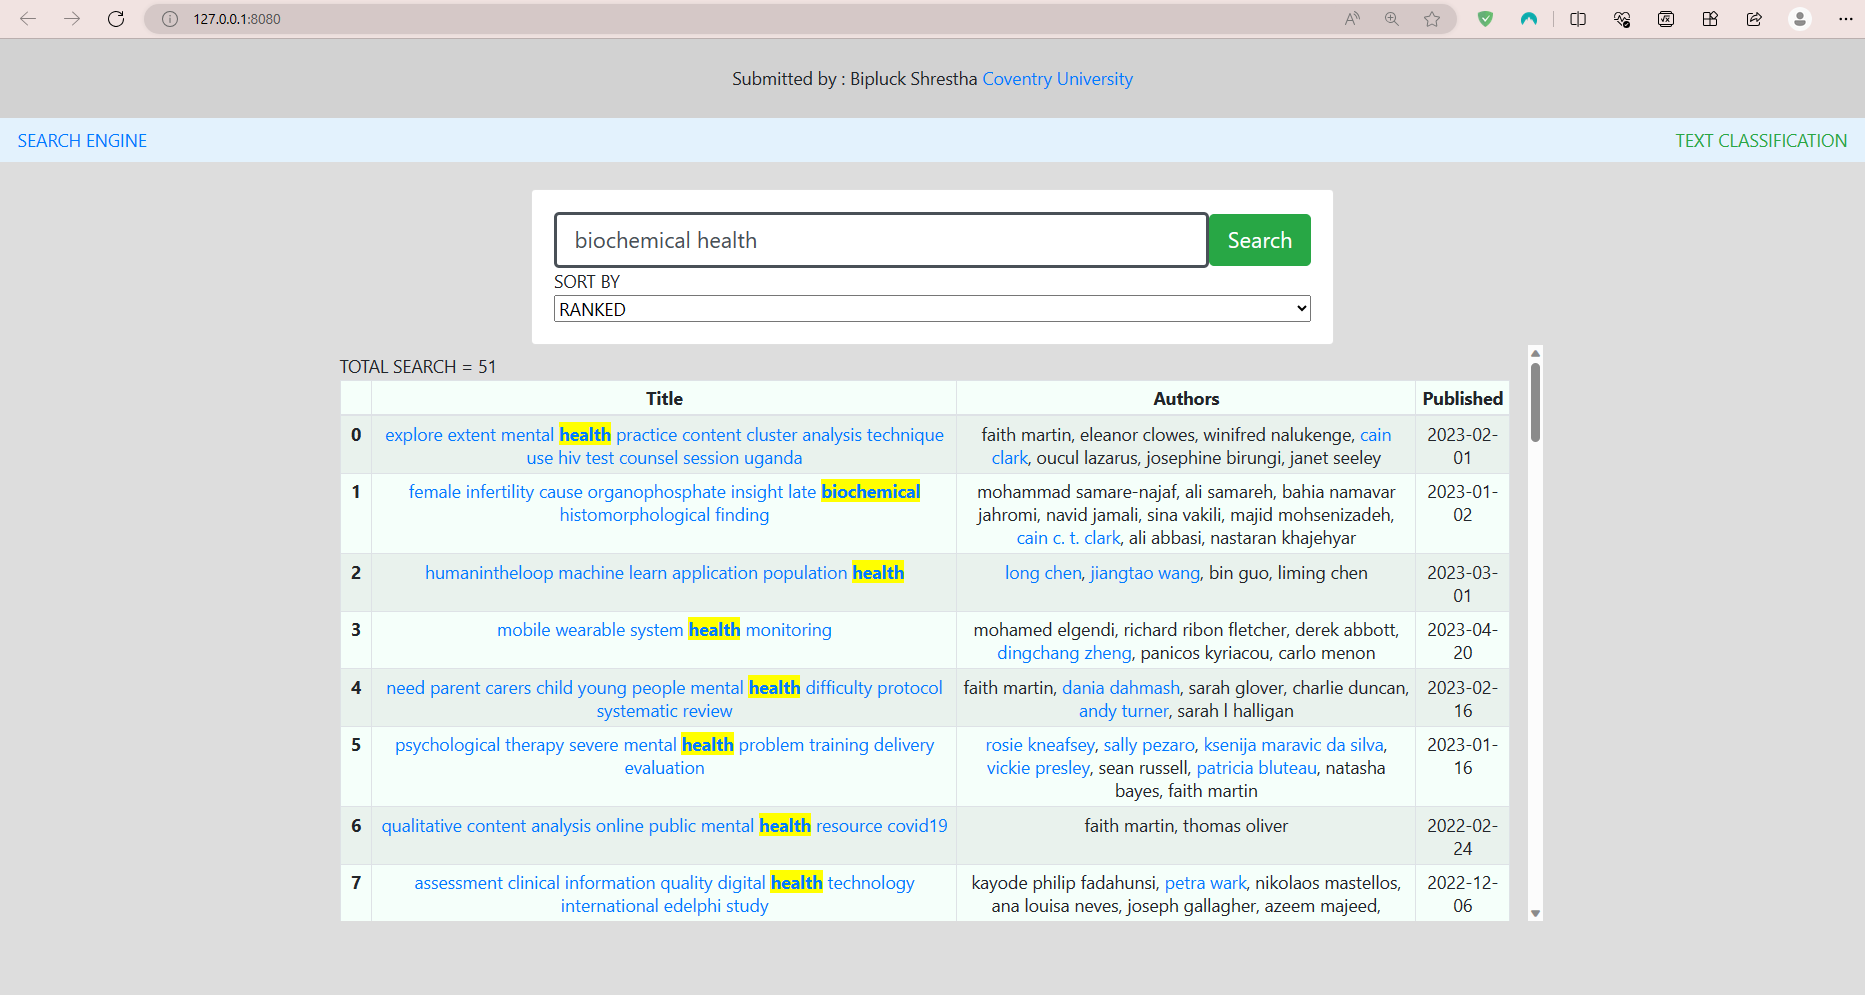

#CONCLUSION

The development of a vertical search engine can greatly enhance the quality of the search experience within a specific market or sector. Vertical search engines can provide users with more relevant and focused results by concentrating on a certain content type or domain, such as academic publications, news stories, or any other specified content type. The process of building a vertical search engine involves several steps, such as data scraping, data preprocessing, index development, and search functionality implementation. These steps enable the search engine to retrieve and deliver relevant content to users based on their queries.

The performance of the search engine can be evaluated using various metrics, such as precision, recall, accuracy, and F1 score. These metrics reveal the search engine's ability to obtain relevant results while minimizing both false positives and false negatives. A well-built vertical search engine can benefit users by offering them a more focused and efficient search experience within a particular domain, facilitating their access to information, and saving them time and effort in finding content that is relevant to them. Additionally, the use of a confusion matrix can improve the search engine's performance by providing a comprehensive understanding of its strengths and weaknesses, allowing developers to fine-tune algorithms, preprocessing techniques, or ranking strategies to optimize the search engine's performance.